In [22]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [23]:

# Load the dataset
data = loadmat('dataset.mat')

X = data['X']
D = data['D']

In [24]:

def compute_wiener_solution(X, D):
    return np.linalg.inv(X.T @ X) @ X.T @ D

def compute_mse_loss(X, D, W):
    y_pred = X @ W
    return np.mean((D - y_pred) ** 2)

def train_lms(X, D, learning_rate, epochs, W_init):
    W = W_init.copy()
    n_samples = X.shape[0]
    loss_history = []
    
    for epoch in range(epochs):
        # Shuffle data for each epoch
        indices = np.random.permutation(n_samples)
        X_shuffled = X[indices]
        D_shuffled = D[indices]
        
        # Process one sample at a time
        for i in range(n_samples):
            x_i = X_shuffled[i:i+1].T  # Make column vector
            d_i = D_shuffled[i:i+1].T  # Make column vector
            
            # Compute prediction
            y_i = X_shuffled[i:i+1] @ W
            
            # Compute error
            e_i = d_i - y_i
            
            # Update weights using LMS rule
            W += learning_rate * x_i * e_i
        
        # Record MSE loss after each epoch
        current_mse = compute_mse_loss(X, D, W)
        loss_history.append(current_mse)
    
    return W, loss_history

# Part a: Compute Wiener solution
W_optimal = compute_wiener_solution(X, D)
optimal_mse = compute_mse_loss(X, D, W_optimal)

print("Optimal Wiener solution:")
print(f"W* = {W_optimal.flatten()}")
print(f"Optimal MSE = {optimal_mse}")



Optimal Wiener solution:
W* = [ 1.0006781   1.00061145 -2.00031968]
Optimal MSE = 0.00010079903131736768


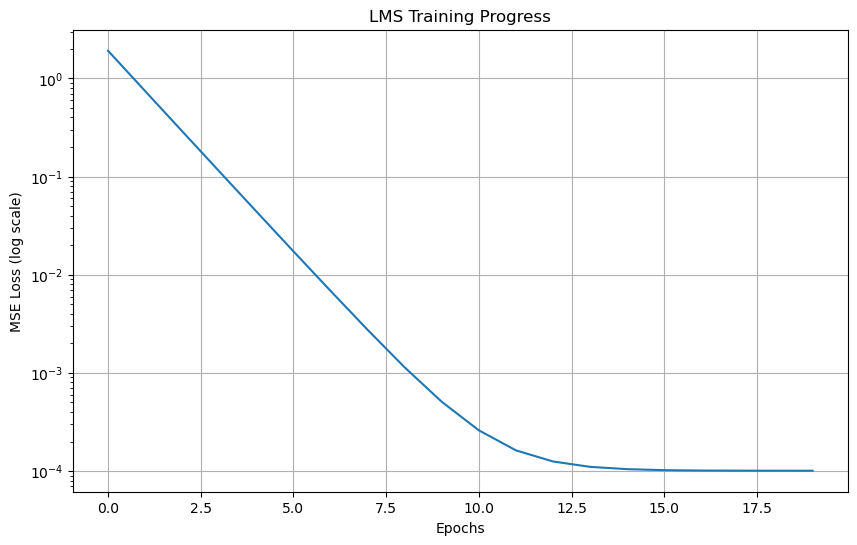

Final weights after LMS:
W_final = [ 1.00065239  1.00044717 -2.00025107]
Final MSE = 0.0001008293569977441


In [25]:
# Part b: Train using LMS with learning rate 0.005
W_init = np.array([[0.53], [0.20], [0.10]])
epochs = 20
learning_rate = 0.005

W_lms, loss_history = train_lms(X, D, learning_rate, epochs, W_init)

# Plot MSE loss vs Epochs
plt.figure(figsize=(10, 6))
plt.semilogy(range(epochs), loss_history)
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('MSE Loss (log scale)')
plt.title('LMS Training Progress')
plt.show()

# Report final weights and MSE
final_mse = compute_mse_loss(X, D, W_lms)
print("Final weights after LMS:")
print(f"W_final = {W_lms.flatten()}")
print(f"Final MSE = {final_mse}")

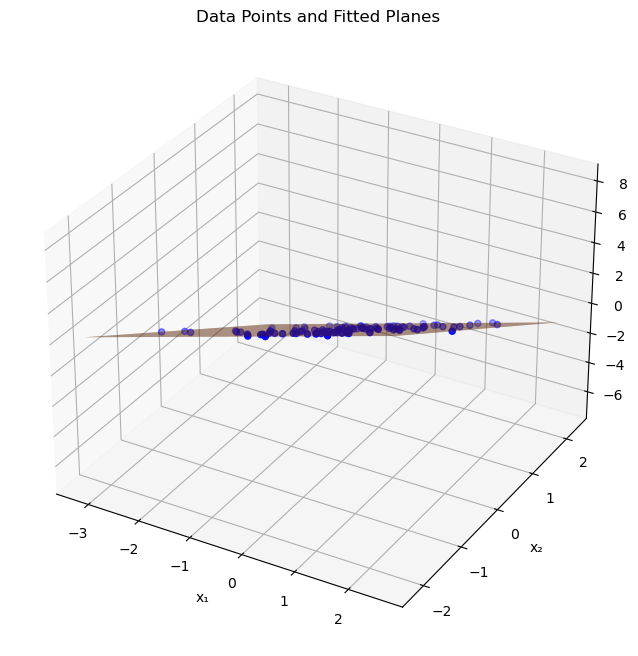

In [26]:
# Part c: 3D visualization
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(X[:, 1], X[:, 2], D[:, 0], c='b', marker='o', label='Data points')

# Create mesh grid for plotting planes
x1_min, x1_max = X[:, 1].min(), X[:, 1].max()
x2_min, x2_max = X[:, 2].min(), X[:, 2].max()
x1_grid, x2_grid = np.meshgrid(np.linspace(x1_min, x1_max, 20),
                              np.linspace(x2_min, x2_max, 20))

# Plot optimal plane
Z_optimal = W_optimal[0] + W_optimal[1]*x1_grid + W_optimal[2]*x2_grid
ax.plot_surface(x1_grid, x2_grid, Z_optimal, alpha=0.3, color='r', label='Optimal solution')

# Plot LMS plane
Z_lms = W_lms[0] + W_lms[1]*x1_grid + W_lms[2]*x2_grid
ax.plot_surface(x1_grid, x2_grid, Z_lms, alpha=0.3, color='g', label='LMS solution')

ax.set_xlabel('x₁')
ax.set_ylabel('x₂')
ax.set_zlabel('d')
plt.title('Data Points and Fitted Planes')
plt.show()

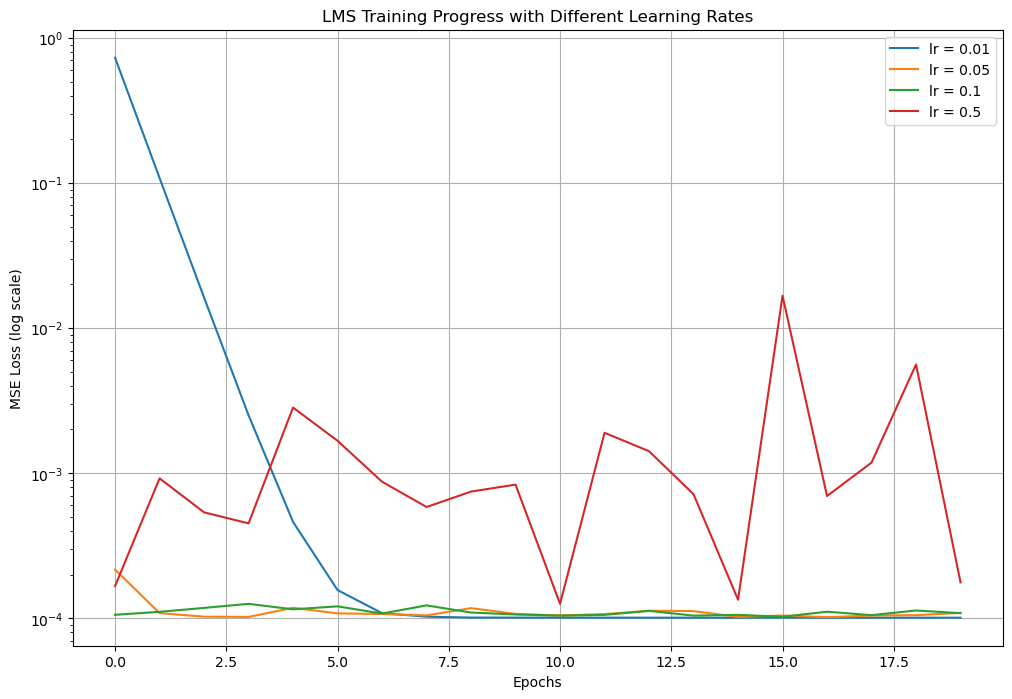

C:\Users\kojil\AppData\Local\Temp\ipykernel_39748\1869336787.py:6: RuntimeWarning: overflow encountered in square
  return np.mean((D - y_pred) ** 2)
c:\Users\kojil\anaconda3\lib\site-packages\matplotlib\scale.py:253: RuntimeWarning: overflow encountered in power
  return np.power(self.base, a)


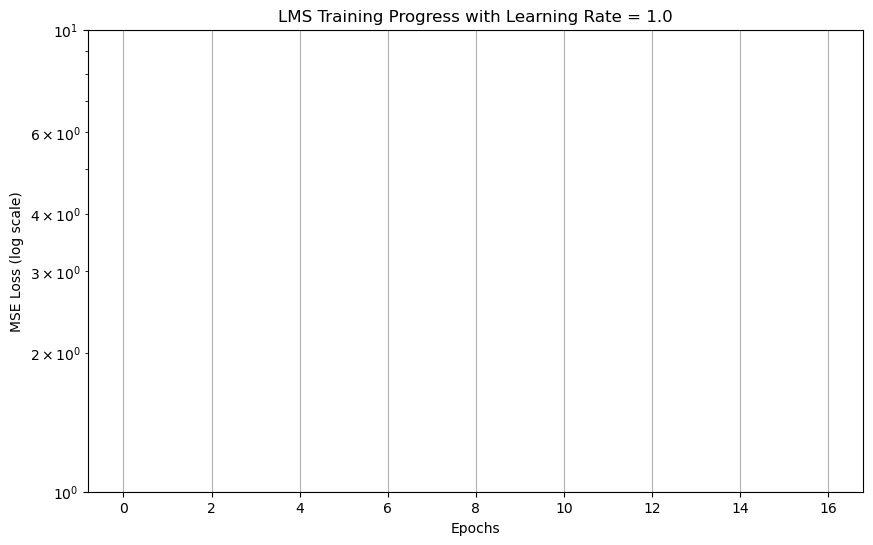

In [27]:
# Part d: Compare different learning rates
learning_rates = [0.01, 0.05, 0.1, 0.5]
results = []

plt.figure(figsize=(12, 8))
for lr in learning_rates:
    W_temp, loss_history = train_lms(X, D, lr, epochs, W_init)
    plt.semilogy(range(epochs), loss_history, label=f'lr = {lr}')

plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('MSE Loss (log scale)')
plt.title('LMS Training Progress with Different Learning Rates')
plt.legend()
plt.show()

# Test extreme learning rate
lr_extreme = 1.0
W_extreme, loss_history_extreme = train_lms(X, D, lr_extreme, epochs, W_init)
plt.figure(figsize=(10, 6))
plt.semilogy(range(epochs), loss_history_extreme)
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('MSE Loss (log scale)')
plt.title('LMS Training Progress with Learning Rate = 1.0')
plt.show()

## Comments

As we can see from the graph, when lr is 0.01, is a bit too small and the convergence is a bit slow. And when it is 0.5, the curve starts to oscillate back and forth, meaning the learning rate is too large. The 0.05 and 0.1 are good learning rates, which can lead to quick converge. As for 1, it is too large and the gradient starts to diverge.